# Answer template

Please use this notebook for your coursework. Feel free to add more cells for your code and answers, but try to stick to this format. This will make it easier to mark everyone's work fairly.

___________________

In [23]:
# run this
!pip list

Package                       Version
----------------------------- ---------------
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8

# Part A – Exploratory data analysis and data visualisation 

1. Using the pandas library, read the file dataset1.csv into a dataframe. Print or display the first five rows of the dataset. [1 mark]

In [24]:
import pandas as pd

#rename dataset later
dataset1 = pd.read_csv('dataset1.csv')
dataset1.head()

,Monastery,Latitude,Longitude,City,Country,Administrative Region,Historical Region,Starting,Ending,Monastery_index
0,Cistercians,47.13,15.28,Seckau,Austria,Steiermark,STYRIA (AUSTRIA),1130,1958,0
1,Cistercians,48.05,16.13,Vienne,Austria,Niederoesterreich,STYRIA (AUSTRIA),1135,2011,0
2,Cistercians,48.61,15.20,Sanct Pölten,Austria,Niederoesterreich,STYRIA (AUSTRIA),1138,2011,0
3,Cistercians,48.20,14.74,Linz,Austria,Oberoesterreich,STYRIA (AUSTRIA),1142,1784,0
4,Cistercians,48.32,14.17,Linz,Austria,Oberoesterreich,STYRIA (AUSTRIA),1146,1945,0


2. Make a scatterplot from the dataset, with the Longitude column on the x axis, the Latitude column on the y axis, and the colour corresponding to the Monastery_index column. Within the scatterplot function, set the colour map to ’rainbow’. The result should be a scatterplot showing the position of every monastery, with different colours for monasteries with different values in Monastery_index.  [1 mark]

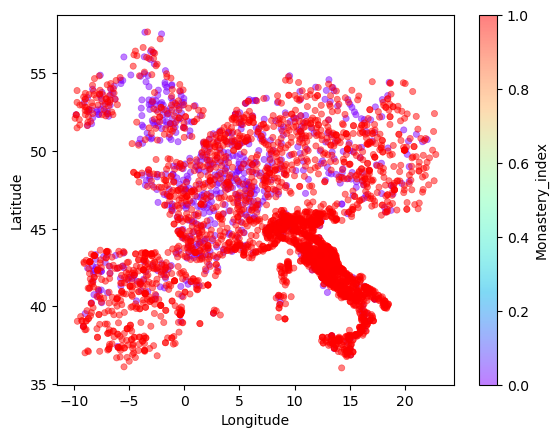

In [25]:
ax = dataset1.plot.scatter(x = "Longitude", y = "Latitude", c = "Monastery_index", cmap = "rainbow", linewidths = 0.5, alpha = 0.5)

3. Plot a histogram for the monastery starting year of activity, represented in the Starting column.
Add the title “Starting year” to the plot. [1 mark]

Text(0.5, 1.0, 'Starting Year')

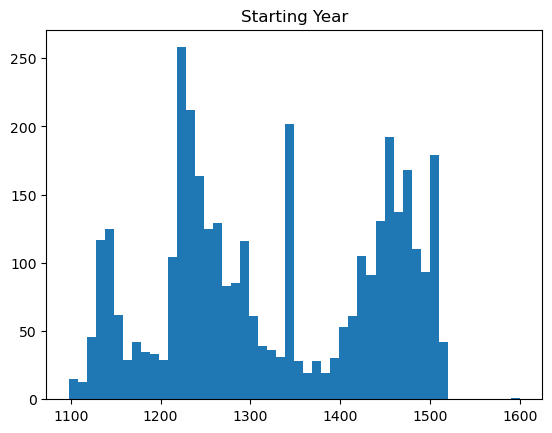

In [26]:
import matplotlib.pyplot as plt

#fig, ax = plt.subplot(1,2)
plt.hist(dataset1["Starting"], 50)
plt.title("Starting Year")

4. Make a figure with two histograms, still using the Starting column:

a) One histogram representing the Cistercian monasteries, corresponding to rows in the dataframe where the Monastery column is equal to 'Cistercians'.

b) And one histogram representing the Franciscan monasteries, corresponding to rows in the dataframe where the Monastery column is equal to 'Franciscans'.

c) Add a legend indicating which histogram corresponds to which type of monastery.

d) Add the title “Starting year” to the figure. 

[2 marks]

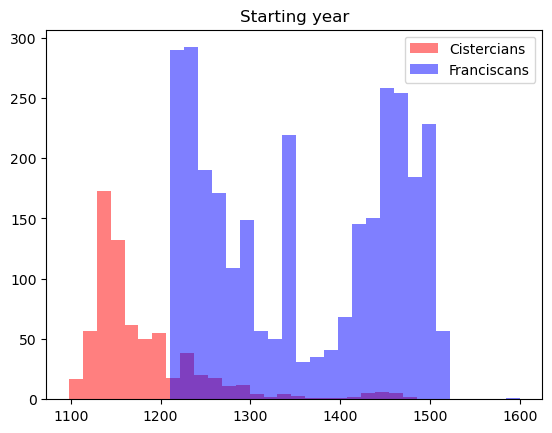

In [27]:
colors = ['r', 'b']

X = dataset1["Starting"]
y = dataset1["Monastery_index"]

for i in range(2):
    x_plot = X[y==i] 
    plt.hist(x_plot, color = colors[i], bins = 25, histtype = 'stepfilled', alpha = 0.5 )

plt.title("Starting year")
plt.legend(["Cistercians","Franciscans"])
plt.show()

5. Repeat numbers 3 and 4, but for the Ending column. Add the title “Ending year” to the plot.
[2 marks]

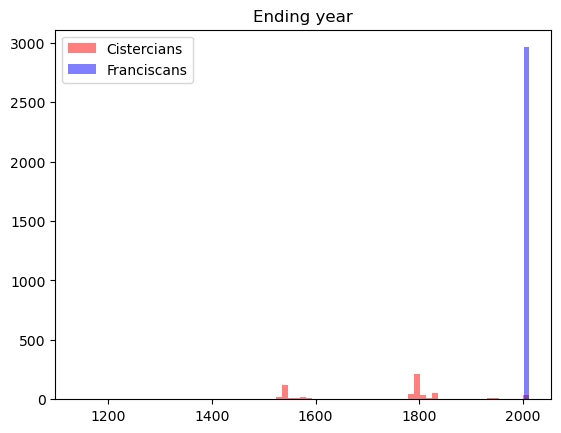

In [28]:
colors = ['r', 'b']
#bins = [50, 85]
X = dataset1["Ending"]
y = dataset1["Monastery_index"]

for i in range(2):
    x_plot = X[y==i] 
    plt.hist(x_plot, color = colors[i], bins = 75, histtype = 'stepfilled', alpha = 0.5 )

plt.title("Ending year")
plt.legend(["Cistercians","Franciscans"])
plt.show()

6. Count the number of times each country appears in the Country column. Use that to make a bar plot, showing one bar for each country, with the bar height representing how many times each country appears in the Country column. This corresponds to the number of monasteries found in each country.
[2 marks]

<BarContainer object of 3678 artists>

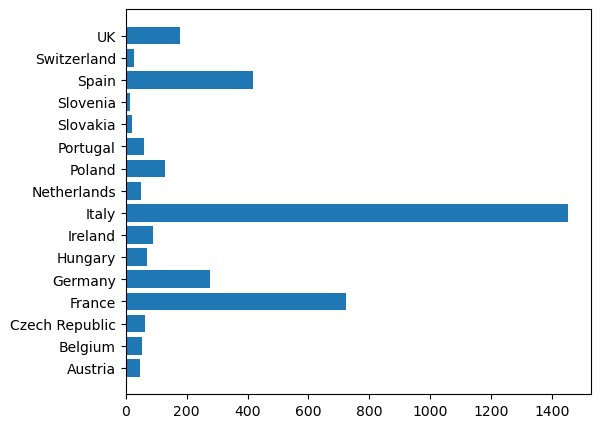

In [29]:
countryMap = {}
countryList = dataset1["Country"].tolist()

for country in dataset1["Country"]:
    if country in countryMap:
        countryMap[country] += 1
    else:
        countryMap[country] = 1
        
counts = []

for country in countryList:
    counts.append(countryMap[country])

fig, ax = plt.subplots(figsize = (6, 5))

#horizontal bar chart so that the text doesn't overlap
ax.barh(dataset1["Country"], counts)

_____________________

# Part B – Training classifiers

7.	Define a variable X corresponding to the Starting and Ending columns of the dataset, and a variable y corresponding to the Monastery_index column. [1 mark]

In [30]:
X = dataset1[['Starting', 'Ending']]
y = dataset1['Monastery_index']

8.	Perform a train-test split, separating X and y into a training test and a test set, leaving 33% of the data in the test set. [1 mark]

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)


9.	Classification using a Perceptron:

a)	Fit a perceptron to the training data, and use it to predict y values for the test set.
[1 mark]

b)	Calculate the fraction of data points in the test set where the predicted y values and the actual y values differ. This fraction should be equal to zero if the prediction is perfect, and equal to 1 if the prediction is wrong for 100% of the test set. Print the value of that fraction in decimals (like 0.01, 0.2394, or 0.9999923).  [2 marks]

c)	Plot a confusion matrix showing how well the classifier performs on the test set. [1 mark]

d)	Treating “Franciscan” as “Positive” and “Cistercian” as “Negative”, Print out the precision, recall, accuracy and F1 score of the perceptron. [2 marks]

fraction:  0.1779242174629324
Precision =  0.8254637436762225
Accuracy =  0.8220757825370676
Recall =  0.9908906882591093
F1 =  0.9006439742410303


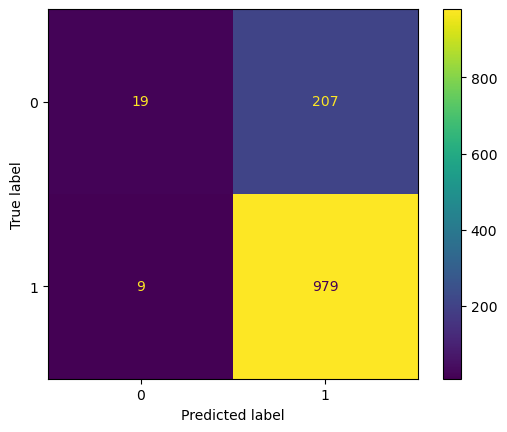

In [32]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

perc = Perceptron()
perc.fit(X_train, y_train)

y_pred1 = perc.predict(X_test)

#count = 0
#for i in range(len(y_pred)):
#    if y_pred[i] != y_test.to_list()[i]:
#        count+=1
#fraction = count/len(y_pred)
#print(fraction)

print("fraction: ", 1-perc.score(X_test, y_test))

cm1 = confusion_matrix(y_test, y_pred1)
cmdisp1 = ConfusionMatrixDisplay(confusion_matrix = cm1)
cmdisp1.plot()

#print(type(X_test), type(y_test))

from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print("Precision = ", precision_score(y_test, y_pred1))
print("Accuracy = ", accuracy_score(y_test, y_pred1))
print("Recall = ", recall_score(y_test, y_pred1))
print("F1 = ", f1_score(y_test, y_pred1))

10.	Classification using Logistic Regression: do the same as the question above, but using the logistic regression classifier. [4 marks]

fraction:  0.025535420098846795
Precision =  0.978978978978979
Accuracy =  0.9744645799011532
Recall =  0.9898785425101214
F1 =  0.984398590840463


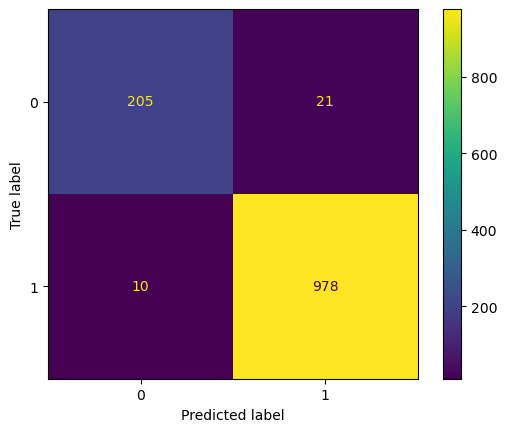

In [33]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(random_state = 42)
reg.fit(X_train, y_train)

y_pred2 = reg.predict(X_test)
print("fraction: ", 1-reg.score(X_test, y_test))

cm2 = confusion_matrix(y_test, y_pred2)
cmdisp2 = ConfusionMatrixDisplay(confusion_matrix = cm2)
cmdisp2.plot()

print("Precision = ", precision_score(y_test, y_pred2))
print("Accuracy = ", accuracy_score(y_test, y_pred2))
print("Recall = ", recall_score(y_test, y_pred2))
print("F1 = ", f1_score(y_test, y_pred2))

For open-ended questions like the ones below, write your answers in a new cell of code, either as a commented-out line starting with #, or as a markdown cell. Indicate what question you’re answering, by copying the question as well. For example:

11.	Explain the importance of the train-test split in machine learning. What might happen if you don’t have a proper split? [ 2 marks ]

**>>> Answer by editing this cell (double-click here)**

Having an improper train-test split this can lead to overfitting or underfitting on the data. If the training data is too small the model will not have been trained on enough information to give nuanced and accurate insights into the data however, if it has too small a testing set it would be too biased to the training set and may not handle that variation well.

12.	Which classifier (Perceptron or Logistic Regression) performed better at this task? Explain how you’ve arrived at this answer. [4 marks] 

**>>> Answer by editing this cell (double-click here)**
The logistic regression has performed better in this task, this is clear through a comparison of the above metrics (labelled as fraction, precision, accuracy and f1) clearly the logistic regression has outperformed the perceptron with better scores in all the aforementioned metrics. However the perceptron (in this run) has a higher recall than the logistic regression model.

13.	If you run the code from questions 8, 9, and 10 again, do the scores (precision, recall, accuracy, F1) change? Why (or why not)? Explain where those scores come from, and how do they change (or don't change) if you run the code again. [3 marks]

**>>> Answer by editing this cell (double-click here)**

The scores do change, this is due to the fact that the train-test split is random and although i have used random state in the regression models i haven't used it in the train test split method, this means the training and testing set will vary with each run and as such so will the results for each model. However, the logistic regression seems to be consistently outperforming the perceptron with each new run. 

_______________

# Part C – Linear Regression

14. Read the file `dataset2.csv` into a dataframe. Make four scatterplots, with different variables (different columns) on the x and y axes, with the variable `quality` on the colour axis. For each scatterplot, choose a different pair of x and y variables, which cannot include `quality`. [1 mark]

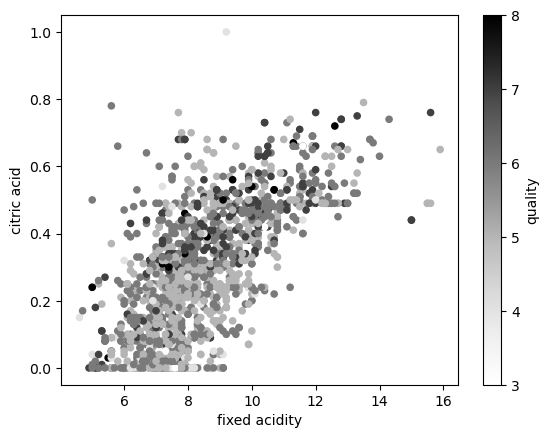

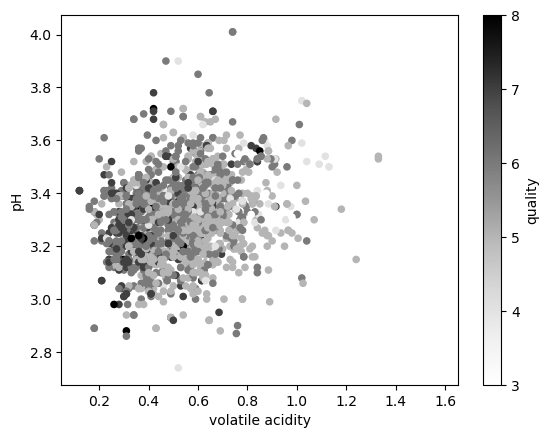

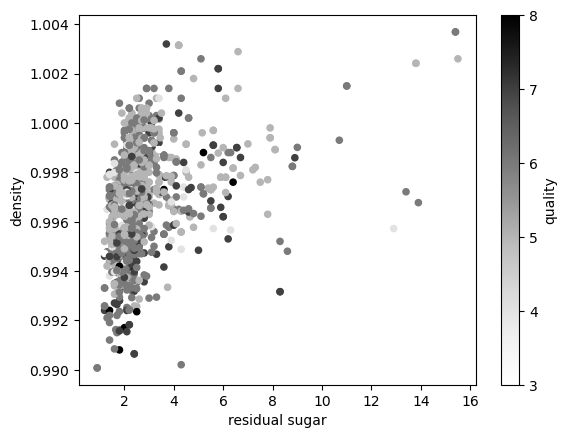

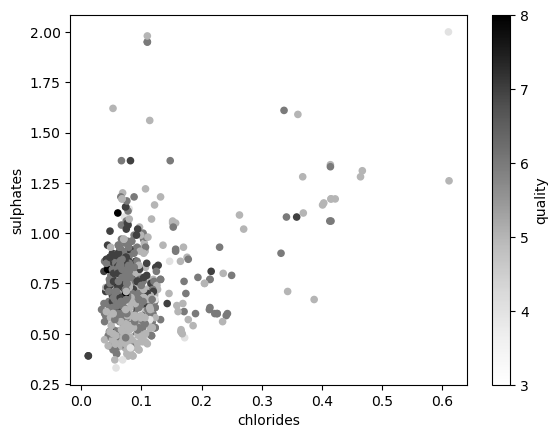

In [34]:
dataset2 = pd.read_csv("dataset2.csv")
columns = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol" ]
ax1 = dataset2.plot.scatter(x = columns[0], y = columns[2], c= "quality")
ax2 = dataset2.plot.scatter(x = columns[1], y = columns[8], c= "quality")
ax3 = dataset2.plot.scatter(x = columns[3], y = columns[7], c= "quality")
ax4 = dataset2.plot.scatter(x = columns[4], y = columns[9], c= "quality")

15. Print the Pearson correlation between the pairs of variables you have included in the scatterplots. 
For every pair of variables, print the names of the variables, and the corresponding correlation. 
[1 mark]

In [35]:
from scipy.stats import pearsonr

print("the pcc for x = ", columns[0], "and y =", columns[2], " is: ", pearsonr(dataset2[columns[0]], dataset2[columns[2]])[0] )
print("the pcc for x = ", columns[1], "and y =", columns[8], " is: ", pearsonr(dataset2[columns[1]], dataset2[columns[8]])[0] )
print("the pcc for x = ", columns[3], "and y =", columns[7], " is: ", pearsonr(dataset2[columns[3]], dataset2[columns[7]])[0] )
print("the pcc for x = ", columns[4], "and y =", columns[9], " is: ", pearsonr(dataset2[columns[4]], dataset2[columns[9]])[0] )

            
# fixed acidity, citric acid
# volatile acidity, pH
# residual sugar, density
# chlorides, sulphates
        

the pcc for x =  fixed acidity and y = citric acid  is:  0.6717034347641058
the pcc for x =  volatile acidity and y = pH  is:  0.23493729440739314
the pcc for x =  residual sugar and y = density  is:  0.35528337098337653
the pcc for x =  chlorides and y = sulphates  is:  0.3712604812854252


16. Linear regression: [2 marks]
    
a) Choosing the input variable X corresponds to any three columns of the dataset, except for `quality`, and the variable y corresponds to the `quality` column.

b) Fit a linear regression between X and y.

c) Print out the R2 score of the linear regression.

d) Print out the linear regression model’s slope coefficients and intercept.

In [36]:
from sklearn.linear_model import LinearRegression

X = dataset2[["fixed acidity", "density", "chlorides"]]
y = dataset2["quality"]

reg = LinearRegression()
reg.fit(X,y)

print("R^2: ", reg.score(X,y))
print("slope: ", reg.coef_)
print("intercept: ", reg.intercept_)

R^2:  0.1414878431922152
slope:  [   0.19910686 -190.7095389    -1.36769803]
intercept:  194.18825307225566


17. K-fold cross-validation [3 marks]

a) Using the same X and y variables defined in the question above, perform a K-fold cross-validation of the linear regression model, with K = 10.

b) For each fold, calculate the R2 score.

c) Print the mean and standard deviation of the ten R2 scores.

In [37]:
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits = 10)

scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    score = reg.score(X_test, y_test)
    scores.append(score)

mean = np.mean(scores)
variance = np.var(scores)

print("Mean of scores: ", mean, " and variance of scores: ", variance)

Mean of scores:  0.03943581073288539  and variance of scores:  0.018200980652997394


18.	If, rather than choosing three columns, you had used more columns to predict quality, would the R2 score of your model necessarily be higher? Why/why not? In which circumstances would it be higher or not? (Feel free to try it! But please provide a justification for your answer) [3 marks]

**>>> Answer by editing this cell (double-click here)**

As the columns used to predict quality increases the R2 score will get higher. However this could make for more a more biased model and the R2 value could decrease when exposed to data not in the training set. There should be a specific amount of columns at which the bias is low and the R2 value is still high. 

19.	Imagine you have two linear regressions, one with R2 = 0.80 and another with R2 = 0.90. Under what circumstances would the first model be preferable over the second one? What if instead you had two classifiers, one with accuracy = 80% and another with accuracy = 90%? [3 marks]

**>>> Answer by editing this cell (double-click here)**

The first model would be preferable over the second if it were far more time efficient. If for example the second model required a specialised computer and days to run only to increase the R2 score by 0.1, the first model which runs much faster would be preferable. The same logic applies with classifiers.

_____________________

# Part D – Clustering

20. K-means clustering:

a) Read the file `dataset3.csv` into a dataframe.

b) Define a variable X corresponding to the `Longitude` and `Latitude` columns of the dataset.

c) Using the K-means clustering algorithm and the variable X, cluster the trees 3 times, using k = 5, 10, 15.

d) Make a scatterplot showing the results of each clustering, with one colour for each cluster.
Suggestion: use a categorical colour map such as tab10 or tab20.
[2 marks]

C:\Users\slipj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\slipj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\slipj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


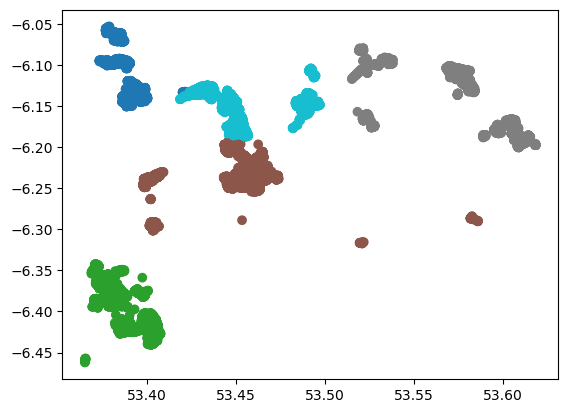

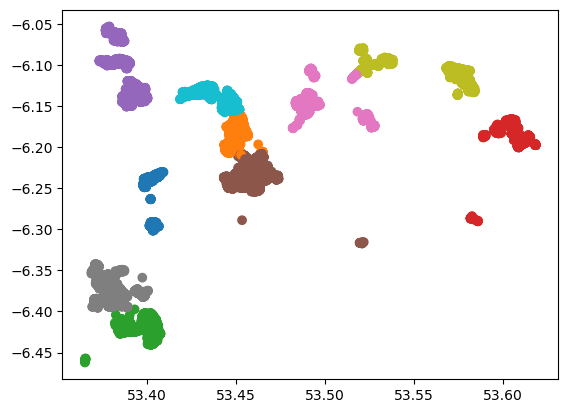

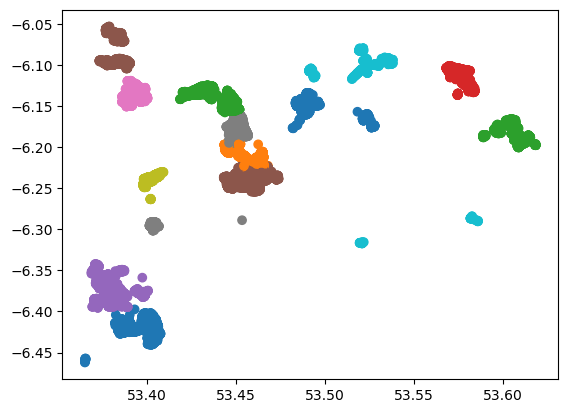

In [38]:
from sklearn.cluster import KMeans

dataset3 = pd.read_csv("dataset3.csv")
X = dataset3[["Longitude", "Latitude"]]

kmeans1 = KMeans(n_clusters = 5, random_state = 42).fit_predict(X)
kmeans2 = KMeans(n_clusters = 10, random_state = 42).fit_predict(X)
kmeans3 = KMeans(n_clusters = 15, random_state = 42).fit_predict(X)

clusterArr = [kmeans1, kmeans2, kmeans3]

for i in range(len(clusterArr)): 
    plt.scatter(x = dataset3["Latitude"], y = dataset3["Longitude"], c = clusterArr[i], cmap = "tab10" )
    plt.show()

#plt.scatter(x = dataset3["Latitude"], y = dataset3["Longitude"], c = kmeans1, cmap = "tab20" )
#plt.scatter(x = dataset3["Latitude"], y = dataset3["Longitude"], c = kmeans2, cmap = "tab20" )
#plt.scatter(x = dataset3["Latitude"], y = dataset3["Longitude"], c = kmeans3, cmap = "tab20" )


21. DBSCAN clustering:

a) Using the same X variable as above, using the DBSCAN clustering algorithm, cluster the trees a total of 4 times, setting the eps parameter to 0.001, 0.005, 0.01, 0.05.

b) Make a scatterplot showing the results of each clustering, with one colour for each cluster. 
Suggestion: use a categorical colour map such as tab10 or tab20.
[2 marks]

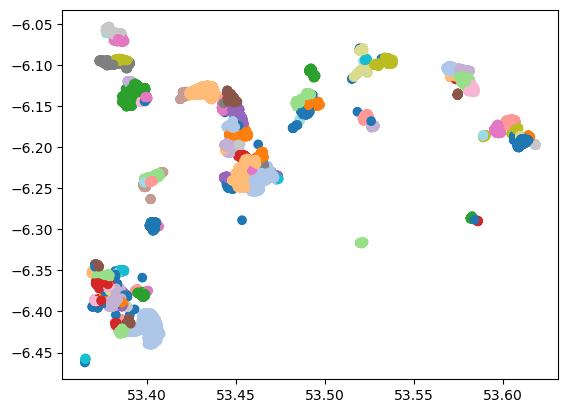

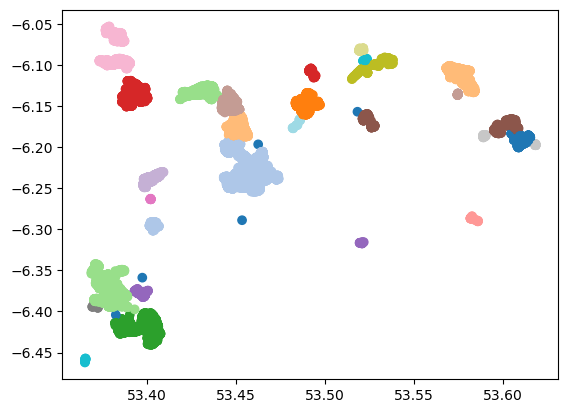

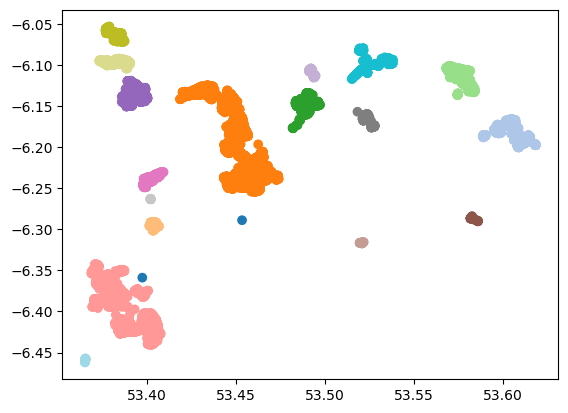

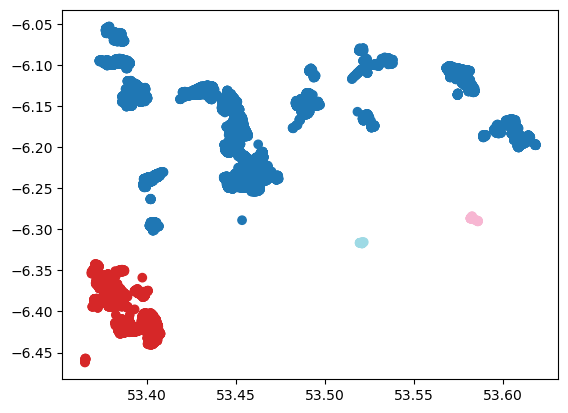

In [39]:
from sklearn.cluster import DBSCAN

epsArr = [0.001, 0.005, 0.01, 0.05]
for e in epsArr:
    dbscan = DBSCAN(eps = e).fit_predict(X)
    plt.scatter(x = dataset3["Latitude"], y = dataset3["Longitude"], c = dbscan, cmap = "tab20")
    plt.show()

22. Using the Silhouette score, compare the 3 runs of K-means and the 4 runs of DBSCAN. Which one of the 7 runs produces the 
best clustering, according to the Silhouette score? [2 marks]

In [40]:
from sklearn.metrics import silhouette_score
#score = silhouette_score(dataset3, )

epsArr = [0.001, 0.005, 0.01, 0.05]
for e in epsArr:
    dbscan = DBSCAN(eps = e).fit_predict(X)
    score = silhouette_score(X, dbscan)
    print("Silhouette score for DBSCAN clustering algorithm, with eps = ", e, ":  ", score)
    
nvalues = [5, 10, 15]
for n in nvalues:
    kmeans = KMeans(n_clusters = n, random_state = 42).fit_predict(X)
    score = silhouette_score(X, kmeans)
    print("Silhouette score for Kmeans clustering algorithm, with ", n," clusters is: ", score)

Silhouette score for DBSCAN clustering algorithm, with eps =  0.001 :   0.24654779191504977
Silhouette score for DBSCAN clustering algorithm, with eps =  0.005 :   0.5407076619494622
Silhouette score for DBSCAN clustering algorithm, with eps =  0.01 :   0.3930946092166295
Silhouette score for DBSCAN clustering algorithm, with eps =  0.05 :   0.4388338080434456


C:\Users\slipj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for Kmeans clustering algorithm, with  5  clusters is:  0.5959785894713657


C:\Users\slipj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for Kmeans clustering algorithm, with  10  clusters is:  0.6238164318112409


C:\Users\slipj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for Kmeans clustering algorithm, with  15  clusters is:  0.650450603004426


23. Using the Davies-Bouldin score, compare the 3 runs of K-means and the 4 runs of DBSCAN. Which one of the 7 runs produces the best clustering according to the Davies-Bouldin score? [2 marks]

In [41]:
from sklearn.metrics import davies_bouldin_score


for e in epsArr:
    dbscan = DBSCAN(eps = e).fit_predict(X)
    score = davies_bouldin_score(X, dbscan)
    print("Davies Bouldin score for DBSCAN clustering algorithm, with eps = ", e, ":  ", score)
    
for n in nvalues:
    kmeans = KMeans(n_clusters = n, random_state = 42).fit_predict(X)
    score = davies_bouldin_score(X, kmeans)
    print("Davies Bouldin score for Kmeans clustering algorithm, with ", n," clusters is: ", score)
    

Davies Bouldin score for DBSCAN clustering algorithm, with eps =  0.001 :   1.3049809972596842
Davies Bouldin score for DBSCAN clustering algorithm, with eps =  0.005 :   0.8701655709944798
Davies Bouldin score for DBSCAN clustering algorithm, with eps =  0.01 :   0.5967046437384795
Davies Bouldin score for DBSCAN clustering algorithm, with eps =  0.05 :   0.4451886348953754


C:\Users\slipj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Davies Bouldin score for Kmeans clustering algorithm, with  5  clusters is:  0.5859319996788882


C:\Users\slipj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Davies Bouldin score for Kmeans clustering algorithm, with  10  clusters is:  0.5333967575905957


C:\Users\slipj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Davies Bouldin score for Kmeans clustering algorithm, with  15  clusters is:  0.450247173512791


24. Using another clustering algorithm (not K-means, not DBSCAN), and a range of hyperparameter values if appropriate, cluster the trees according to their latitude and longitude, as above. According to the silhouette and Davies-Bouldin scores, does any of your model runs produce better clustering? [2 marks]

In [47]:
from sklearn.cluster import AgglomerativeClustering

n_values = [5, 10, 15, 20]


for n in n_values: 
    model = AgglomerativeClustering(n_clusters = n)
    labels = model.fit_predict(X)
    dave_score = davies_bouldin_score(X, labels)
    print("the davies bouldin score for, ", n, ", clusters is: ", dave_score)
    
for n in n_values: 
    model = AgglomerativeClustering(n_clusters = n)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    print("the silhouette score for, ", n, ", clusters is: ", score)

#the davies bouldin score for 5 clusters is higher than the highes for the kmeans clustering algorithm.

hallo!
the davies bouldin score for,  5 , clusters is:  0.6239010143121222
the davies bouldin score for,  10 , clusters is:  0.5501221097936871
the davies bouldin score for,  15 , clusters is:  0.43617026884823584
the davies bouldin score for,  20 , clusters is:  0.4783493865474833


TypeError: 'numpy.float64' object is not callable

25. Usually, DBSCAN takes longer than K-means to run, and the time it takes to run is affected by the eps parameter. Explain why that is the case. [4 marks]

**>>> Answer by editing this cell (double-click here)**

The K-means algorithm runs in O(n) time, specifically n*d*k*t, for n data points, d dimensions, k clusters and t iterations (in other words the runtime of the kmeans algorithm is proportional to the product of n,d,k,t.
On the other hand the DBSCAN algorithm has a time efficiency of O(n^2) (worst case) because, for each point, it needs to compute the distance of all other points in a certain range (this is highly dependent on the eps parameter, although not completely dependent in all variations of the algorithm). Therefore, varying eps (as well as the minPts parameter) can vary, the amount of computations to be made for each point, therefore varying the efficiency of the algorithm.

26. Provide an example of one case in which it might be better to use DBSCAN rather than K-means, and an example of one case in which it might be better to use K-means rather than DBSCAN. Explain why, in both cases. [4 marks]

**>>> Answer by editing this cell (double-click here)**

DBSCAN is preferable in a dataset with a lot of noise and varying shapes and sizes. This is because K-means always produces K clusters (typically of similar size) and will, therefore, cluster noise. It is also because of the methodologies used: DBSCAN handles different shapes and sizes better because it is more fluid (it takes into account the relative positions of data points for each data point, the categorization of points into core, border and noise (according to the number of points in the neighbourhood) also helps with handling varied size and shapes). Whereas the K-means methodology is less fluid, depending more on the input parameters (k) and the starting centroid locations. 

K-means can be preferable with less varied shaps and sizes and little noise, this is because it this specific kind of data-set is favourable for the K-means algorithm. DBSCAN should cluster in roughly the same way but it would be far less efficient. 

_____________________

# Part E – Model selection

27. Consider the figure in the PDF and compare models A and B. In each case, what difference would it make to add more training examples to the training set? Explain your reasoning. [4 marks]

**>>> Answer by editing this cell (double-click here)**

In model A and model B, as the training set increases in size from 0-100, the error for the training set increases and the error for the testing set decreases, as the training set size increases from 100 to 500 the error remains extrememly similiar for both the training and testing data in model A, this is a sign of a biased model and  underfitting on the data because the error on the testing data closely resembles the error on the training data. In model B, the errors are still fairly seperated (error for testing data is higher than the error for the training data) indicating a higher variance, and possibly overfitting the data. 
In model A, adding more training data will decrease the bias and produce a more accurate fit to the data. In model B, adding more training data will do nothing to decrease the high variance.

28.	Consider the second figure in the PDF and compare models A, B, and C. What is the difference between the three models? How does that relate to the bias-variance trade-off? [6 marks]

**>>> Answer by editing this cell (double-click here)**

In model A and B the error for testing and training sets are incredibly similar for training set sizes > 100, this indicates a biased model in both cases. However, the erro is much higher in model A than in model B

29.	What is overfitting? Why is that a problem, and how can one avoid it? [3 marks]

**>>> Answer by editing this cell (double-click here)**

Overfitting is when the model so closely fits the training data (most likely due to having many degrees of freedom) that it doesn't fit the testing data. This is a problem because it means the model will not be able to make accurate predictions on new data. You can avoid it by decreasing the degrees of freedom (simplifying the model), performing cross-validation to tune the hyperparameters of the model for the optimal fit, or by using only the features which are responsible for most of the variation.  

________________

# Part F – Dimensionality reduction

Consider a scenario where you are working with a complex high-dimensional dataset derived from a biomedical application to detect a disease. The data is expected to have both linear and non-linear relationships, and you aim to reduce the dimensionality for the following purposes: first, to visualize the data in a lower-dimensional space to identify potential clusters or patterns that might indicate different disease states, and second, to preprocess the data for a downstream machine learning task, such as classification of samples into healthy or diseased states. 

30.	Discuss the advantages and disadvantages of using PCA, t-SNE, and UMAP for the visualization purpose, considering factors such as the preservation of local and global structures, computational efficiency, and the potential introduction of artifacts. [3 marks]

**>>> Answer by editing this cell (double-click here)**
An advantage of t-sne and umap over pca is that they preserve local and global structures (umap is usually better than t-sne at this) (close and far distances between data points) however, this comes at a cost of time efficiency with both t-sne and umap having a high time complexity in comparison to pca (this can be reduced by applying pca so that only a certain amount of dimensions remain (enough to preserve local and global structures and decrease computing time of t-sne/umap algorithm) and then applying t-sne/umap). Another disadvantage of t-sne/umap is that the x and y axes can't be interpreted, the distance between clusters means nothing and the output depends largely on the hyperparameters. An advantage of pca, therefore, is that it preserves meaning in the x and y axes. 

31.	Explain how the choice between these dimensionality reduction techniques might change when, after visualising, you want to do the preprocessing for the machine learning task. [3 marks]

**>>> Answer by editing this cell (double-click here)**

pre-processing the data after visualising with pca the parameters that are responsible for little to no variation, might make the t-sne and umap algorithms more efficient and preferrable after preprocessing. 

32.	Discuss the role of interpretability and stability in the choice of dimensionality reduction technique for both tasks. How might the stochastic nature of t-SNE and UMAP influence the reproducibility of your analyses, and how can PCA's linear assumptions limit its usefulness in capturing complex relationships in the data? [3 marks]

**>>> Answer by editing this cell (double-click here)**

The stochastic nature of t-SNE and UMAP leads to variations in the output even when there is no change in the hyperparameter, this means that the results are unlikely to be reproduced exactly.
PCA assumes linear relationships between variables, however when the relationships are non-linear the algorithm doesnt perform well because the data points might not be able to be "flipped" into a maximally informative "position".

________________

# Part G – Applications of Machine Learning

33.	Discuss a scenario where a high accuracy rate might be misleading in evaluating the performance of a classifier. What other metrics would you consider, and why? [3 marks]

**>>> Answer by editing this cell (double-click here)**
A high accuracy rate can be misleading in an unbalanced data set. For example, if most of the data set is apples (99 apples), and all but one is an orange then the model can simply guess apple and have 99% accuracy rate. This does not indicate a good classifier. 
Other metric to consider are precision, recall and the F1 score (which combines the other two metrics), these are more specific because they take into account the True Positive scores and correctly classified scores given other information.
Even better than this is the AUC metric, because this takes into account the False Positive rate (which in the case of the apples and oranges is 100% because there is one false positive and no true negatives (1/(1+0) = 1.0) as well as the true positive rate. 


34. Given a classification task and a dataset, sometimes it’s impossible to make a classifier with 100% precision and 100% recall simultaneously. Explain why. [3 marks]

**>>> Answer by editing this cell (double-click here)**

for the classifier to have 100% precision and 100% recall simultaneously, both the false negative and false positive values must be zero, however this often isn't possible making it so that the precision and recall are often different and rarely simultaneously 100%.

35. In the case of the question above, the data scientist might have to choose between having higher precision or higher recall. Provide an example where it’s preferable to get high recall and low precision (and explain why), and another example where it’s preferable to have high precision and low recall (and explain why). [4 marks]

**>>> Answer by editing this cell (double-click here)**

It is preferable to get high recall and low precision in cases such as medical diagnoses (or any scenario in which a fals negative can be harmful), in which as many positive testing patients are correctly diagnosed as possible and where false positive are far more preferable than a false negative.

It is preferable to get high precision and low recall in cases where a false positive can be very harmful, for example classifying potential convicts (super sketchy) where it is preferable to let some convicts go free than to label innocent people as convicts.

Over this module we explained many examples where a machine learning algorithm was trained on a dataset and became reasonably good at a task, but had a fundamental flaw in its training dataset or feature engineering that ultimately made the model inaccurate or inappropriate for use in real life.

36. Give an example of a machine learning algorithm trained for a particular task where it achieves high accuracy in one context, but low accuracy in another context. Explain what could cause that, how to diagnose it, and suggest a way to address it. [4 marks]

**>>> Answer by editing this cell (double-click here)**
One such example is facial recognition, there have been cases of facial recognition on phones not being able to differentiate between faces in ethnicities other than white. This shows that the algorithm has a high accuracy under the context of use in europe and north america however not anywhere else. This could have been caused by a lack of ethnic diversity in the training and testing data (which is likely when developing the algorithm in a predominantly white area) leading to high accuracy. This can be addressed by adding more variation in the training and testing data. 


37. Give an example of a machine learning algorithm that might have low error in its training and testing datasets, but that still would have a fundamental flaw in its application that is not captured by the error metric. Explain why that is the case, and suggest a way to address that. [3 marks]

**>>> Answer by editing this cell (double-click here)**

One such example is a predictive machine learning algorithm that has been trained and tested on out-dated and biased data. Even though the error for the training and testing data is low, the model will perpetuate the biases of the discriminatory data. One real world example of this is the COMPAS model for predictisng recidivism.

_________________